# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18032180533371503542
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8014868348575793440
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 1880933557731141894
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:1"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11689859713215651237
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:2"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8369225144983620246
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:3"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8335323029137317614
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type:

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

from nltk.corpus import stopwords
import pickle

from tqdm import tqdm
import os

## 1. Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# 2. Preprocessing Categorical Features: project_grade_category

In [5]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

we need to remove the spaces, replace the '-' with '_' and convert all the letters to small

In [6]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

# 3. Preprocessing Categorical Features: project_subject_categories

In [7]:
project_data['project_subject_categories'].value_counts()

Literacy & Language                           23655
Math & Science                                17072
Literacy & Language, Math & Science           14636
Health & Sports                               10177
Music & The Arts                               5180
Special Needs                                  4226
Literacy & Language, Special Needs             3961
Applied Learning                               3771
Math & Science, Literacy & Language            2289
Applied Learning, Literacy & Language          2191
History & Civics                               1851
Math & Science, Special Needs                  1840
Literacy & Language, Music & The Arts          1757
Math & Science, Music & The Arts               1642
Applied Learning, Special Needs                1467
History & Civics, Literacy & Language          1421
Health & Sports, Special Needs                 1391
Warmth, Care & Hunger                          1309
Math & Science, Applied Learning               1220
Applied Lear

>remove spaces, 'the' <br>
replace '&' with '\_', and ',' with '_'

In [8]:
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.lower()
project_data['project_subject_categories'].value_counts()

literacy_language                       23655
math_science                            17072
literacy_language_math_science          14636
health_sports                           10177
music_arts                               5180
specialneeds                             4226
literacy_language_specialneeds           3961
appliedlearning                          3771
math_science_literacy_language           2289
appliedlearning_literacy_language        2191
history_civics                           1851
math_science_specialneeds                1840
literacy_language_music_arts             1757
math_science_music_arts                  1642
appliedlearning_specialneeds             1467
history_civics_literacy_language         1421
health_sports_specialneeds               1391
warmth_care_hunger                       1309
math_science_appliedlearning             1220
appliedlearning_math_science             1052
literacy_language_history_civics          809
health_sports_literacy_language   

# 4. Preprocessing Categorical Features: teacher_prefix

In [9]:
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [10]:
# check if we have any nan values are there
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

True
number of nan values 3


>numebr of missing values are very less in number, we can replace it with Mrs. as most of the projects are submitted by Mrs.

In [11]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

In [12]:
project_data['teacher_prefix'].value_counts()

Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

>Remove '.' <br>
>convert all the chars to small

In [13]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

# 5. Preprocessing Categorical Features: project_subject_subcategories

In [14]:
project_data['project_subject_subcategories'].value_counts()

Literacy                                  9486
Literacy, Mathematics                     8325
Literature & Writing, Mathematics         5923
Literacy, Literature & Writing            5571
Mathematics                               5379
                                          ... 
Civics & Government, Foreign Languages       1
Economics, Nutrition Education               1
ESL, Economics                               1
Community Service, Gym & Fitness             1
Financial Literacy, Foreign Languages        1
Name: project_subject_subcategories, Length: 401, dtype: int64

> same process we did in project_subject_categories

In [15]:
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()
project_data['project_subject_subcategories'].value_counts()

literacy                                9486
literacy_mathematics                    8325
literature_writing_mathematics          5923
literacy_literature_writing             5571
mathematics                             5379
                                        ... 
communityservice_financialliteracy         1
parentinvolvement_teamsports               1
history_geography_warmth_care_hunger       1
civics_government_foreignlanguages         1
gym_fitness_parentinvolvement              1
Name: project_subject_subcategories, Length: 401, dtype: int64

# 6. Preprocessing Categorical Features: school_state

In [16]:
project_data['school_state'].value_counts()

CA    15388
TX     7396
NY     7318
FL     6185
NC     5091
IL     4350
GA     3963
SC     3936
MI     3161
PA     3109
IN     2620
MO     2576
OH     2467
LA     2394
MA     2389
WA     2334
OK     2276
NJ     2237
AZ     2147
VA     2045
WI     1827
AL     1762
UT     1731
TN     1688
CT     1663
MD     1514
NV     1367
MS     1323
KY     1304
OR     1242
MN     1208
CO     1111
AR     1049
ID      693
IA      666
KS      634
NM      557
DC      516
HI      507
ME      505
WV      503
NH      348
AK      345
DE      343
NE      309
SD      300
RI      285
MT      245
ND      143
WY       98
VT       80
Name: school_state, dtype: int64

>convert all of them into small letters

In [17]:
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

# 7. Preprocessing Categorical Features: project_title

In [18]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [20]:
project_data['project_title'].head(5)

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [21]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [22]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [23]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████| 109248/109248 [00:02<00:00, 43479.20it/s]


In [24]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


# 8. Preprocessing Categorical Features: essay

In [25]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [26]:
print("printing some random essay")
print(9, project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(147, project_data['essay'].values[147])

printing some random essay
9 Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my st

In [27]:
preprocessed_essays = preprocess_text(project_data['essay'].values)

100%|██████████| 109248/109248 [00:59<00:00, 1837.71it/s]


In [28]:
print("printing some random essay")
print(9, preprocessed_essays[9])
print('-'*50)
print(34, preprocessed_essays[34])
print('-'*50)
print(147, preprocessed_essays[147])

printing some random essay
9 95 students free reduced lunch homeless despite come school eagerness learn students inquisitive eager learners embrace challenge not great books resources every day many not afforded opportunity engage big colorful pages book regular basis home not travel public library duty teacher provide student opportunity succeed every aspect life reading fundamental students read books boosting comprehension skills books used read alouds partner reading independent reading engage reading build love reading reading pure enjoyment introduced new authors well old favorites want students ready 21st century know pleasure holding good hard back book hand nothing like good book read students soar reading consideration generous funding contribution help build stamina prepare 3rd grade thank much reading proposal nannan
--------------------------------------------------
34 students mainly come extremely low income families majority come homes parents work full time students s

# 8. Preprocessing Numerical Values: price

In [29]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,quantity,price
0,p000001,7,459.56
1,p000002,21,515.89


In [30]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [31]:
project_data['price'].head()

0    154.60
1    299.00
2    516.85
3    232.90
4     67.98
Name: price, dtype: float64

## 8.1 applying StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['std_price']=scaler.transform(project_data['price'].values.reshape(-1, 1) )

In [33]:
project_data['std_price'].head()

0   -0.390533
1    0.002396
2    0.595191
3   -0.177469
4   -0.626236
Name: std_price, dtype: float64

## 8.2 applying MinMaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['nrm_price']=scaler.transform(project_data['price'].values.reshape(-1, 1))

In [35]:
project_data['nrm_price'].head()

0    0.015397
1    0.029839
2    0.051628
3    0.023228
4    0.006733
Name: nrm_price, dtype: float64

### Adding the train_data_numeric_feature_added.csv to the project data

In [36]:
import pandas as pd
import numpy as np 
import os
import math
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import SpatialDropout1D, LSTM, BatchNormalization,concatenate,Flatten,Embedding,Dense,Dropout,MaxPooling2D,Reshape,CuDNNLSTM
from keras.models import Sequential
from keras import Model,Input
from keras.layers.convolutional import Conv2D,Conv1D
import keras.backend as k
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import keras
from sklearn.utils import compute_class_weight
from keras.initializers import he_normal,glorot_normal
from keras.regularizers import l1,l2
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,LearningRateScheduler
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from IPython.display import SVG, display
import pickle 
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [37]:
df = pd.read_csv('train_data_numeric_feature_added.csv')
project_data['presence_of_the_numerical_digits'] = df['presence_of_the_numerical_digits']

In [38]:
print(project_data.shape)
project_data.head(2)

(109248, 23)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,quantity,price,std_price,nrm_price,presence_of_the_numerical_digits
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,2016-12-05 13:43:57,grades_prek_2,literacy_language,esl_literacy,Educational Support for English Learners at Home,...,NaN,My students need opportunities to practice beg...,0,0,My students are English learners that are work...,23,154.6,-0.390533,0.015397,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,mr,fl,2016-10-25 09:22:10,grades_6_8,history_civics_health_sports,civics_government_teamsports,Wanted: Projector for Hungry Learners,...,NaN,My students need a projector to help with view...,7,1,Our students arrive to our school eager to lea...,1,299.0,0.002396,0.029839,0


In [39]:
project_data.nunique()

Unnamed: 0                                      109248
id                                              109248
teacher_id                                       72168
teacher_prefix                                       5
school_state                                        51
project_submitted_datetime                      108537
project_grade_category                               4
project_subject_categories                          51
project_subject_subcategories                      401
project_title                                   100851
project_essay_1                                  94319
project_essay_2                                 108832
project_essay_3                                   3755
project_essay_4                                   3750
project_resource_summary                        108324
teacher_number_of_previously_posted_projects       374
project_is_approved                                  2
essay                                           108986
quantity  

### Observation:
   * out of 23 columns i can see there is 3 different types of columns like numerical(remaining data as mentioned in assignment graph),categorical and text column(preprocessed essay).
   * To complete the remaining features i shall divide the whole preprcessed dataset into 2(numerical and textual).
   * First i shall seperate all the text,categorical and numerical data columns into one individual columns column.
   * Before that To create model, we shall divide the dataset into train,CV and test to avoid the data leakage. 

In [40]:
#Bringing all the numerical features like teacher_number_of_previously_posted_projects, price and quantity into a single feature
project_data.drop(['Unnamed: 0'], axis =1 , inplace = True)
class_label = project_data['project_is_approved']
project_data['remaining_input'] = project_data['teacher_number_of_previously_posted_projects']  +\
                                    project_data['presence_of_the_numerical_digits']  + \
                                    project_data['price'] +project_data['nrm_price']+\
                                    project_data['std_price']+project_data['quantity']
project_data['total_txt'] = project_data['project_title'] + ' ' + project_data['essay'] + ' ' + project_data['project_resource_summary']

In [41]:
#As we can see there are NAN in the dataset we shall fill with the same values by converting into string.
project_data.replace(to_replace=np.NaN, value= str('nan'),inplace=True)

In [42]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109248 entries, 0 to 109247
Data columns (total 24 columns):
id                                              109248 non-null object
teacher_id                                      109248 non-null object
teacher_prefix                                  109248 non-null object
school_state                                    109248 non-null object
project_submitted_datetime                      109248 non-null object
project_grade_category                          109248 non-null object
project_subject_categories                      109248 non-null object
project_subject_subcategories                   109248 non-null object
project_title                                   109248 non-null object
project_essay_1                                 109248 non-null object
project_essay_2                                 109248 non-null object
project_essay_3                                 109248 non-null object
project_essay_4                      

In [43]:
# Now lets remove the un-nessesary data.
col = ['id','teacher_id','project_submitted_datetime','project_title','project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4','project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved','price', 'std_price','nrm_price','quantity',
        'presence_of_the_numerical_digits','essay']

project_data.drop(labels=col, axis=1, inplace=True)

In [44]:
project_data.columns

Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'remaining_input', 'total_txt'],
      dtype='object')

In [45]:
#numerical_feat=project_data['remaining_input']
#project_data=project_data.drop('remaining_input',axis=1)
project_data.head(1)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,remaining_input,total_txt
0,mrs,in,grades_prek_2,literacy_language,esl_literacy,177.224864,Educational Support for English Learners at Ho...


## Spliting the dataset into train cv and test 

In [86]:
#def split_dataset(dataframe):
col_names = project_data.columns
train,test,y_train,y_test = train_test_split(project_data, class_label , stratify = class_label,test_size = 0.3)
train,cv,y_train,y_cv = train_test_split(train,y_train,stratify = y_train,test_size = 0.2)

train.shape,test.shape,cv.shape,y_train.shape,y_test.shape,y_cv.shape

((61178, 7), (32775, 7), (15295, 7), (61178,), (32775,), (15295,))

In [89]:
remain_train =train['remaining_input']
remain_test = test['remaining_input']
remain_cv= cv['remaining_input']

train.drop(['remaining_input'], axis=1,inplace=True)
test.drop(['remaining_input'], axis=1,inplace=True)
cv.drop(['remaining_input'], axis=1,inplace=True)

In [90]:
train.head(1)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,total_txt
20852,ms,ok,grades_3_5,literacy_language_math_science,literacy_mathematics,Books in the Classroom-Building Fluent Readers...


### Converting all the text data into numerical according to the ranking of whole dataset.

In [ ]:
'''def wordtofreq(wordlst):
    bow = CountVectorizer(lowercase= False)
    bow_words = bow.fit_transform(wordlst)
    #print(bow_words.shape)
    freqs = bow_words.sum(axis=0).A1
    index = freqs.argsort()
    words = bow.get_feature_names()
    return dict(list(zip(words,freqs)))
    
def rankingWords(sentence,dictionary):
    ranked_sent=list()
    for sent in sentence:
        d=list()
        for i in range(len(sent.split())):
            w =sent.split()[i]
            if w in dictionary.keys():
                r =dictionary[w]
                d.append(r)
        ranked_sent.append(d)
    return ranked_sent

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def converting_text_to_numeric_on_rankings(text):
    review_count=list()
    for i in text.values:
        review_count.append(i.split())

    words_list=[item for review_count in review_count for item in review_count]

    word_dict=wordtofreq(words_list)

    #https://stackoverflow.com/questions/40488532/python-sorting-the-values-of-a-dict-and-extracting-the-keys-corresponding-to-th
    ranked_word_dict={key: rank for rank, key in enumerate(sorted(word_dict, key=word_dict.get,reverse=True), 1)}

    #maping each and every review into ranked listed review
    ranked_datareviews=np.array(rankingWords(text.values,ranked_word_dict))
    return ranked_datareviews

X_train['school_state'] = [i for i in converting_text_to_numeric_on_rankings(train['school_state'])]
X_test['school_state'] = [i for i in converting_text_to_numeric_on_rankings(test['school_state'])]
X_cv['school_state'] = [i for i in converting_text_to_numeric_on_rankings(cv['school_state'])]

X_train['teacher_prefix'] = [i for i in converting_text_to_numeric_on_rankings(train['teacher_prefix'])]
X_test['teacher_prefix'] = [i for i in converting_text_to_numeric_on_rankings(test['teacher_prefix'])]
X_cv['teacher_prefix'] = [i for i in converting_text_to_numeric_on_rankings(cv['teacher_prefix'])]

X_train['project_grade_category'] = [i for i in converting_text_to_numeric_on_rankings(train['project_grade_category'])]
X_test['project_grade_category'] = [i for i in converting_text_to_numeric_on_rankings(test['project_grade_category'])]
X_cv['project_grade_category'] = [i for i in converting_text_to_numeric_on_rankings(cv['project_grade_category'])]

X_train['project_subject_categories'] = [i for i in converting_text_to_numeric_on_rankings(train['project_subject_categories'])]
X_test['project_subject_categories'] = [i for i in converting_text_to_numeric_on_rankings(test['project_subject_categories'])]
X_cv['project_subject_categories'] = [i for i in converting_text_to_numeric_on_rankings(cv['project_subject_categories'])]

X_train['project_subject_subcategories'] = [i for i in converting_text_to_numeric_on_rankings(train['project_subject_subcategories'])]
X_test['project_subject_subcategories'] = [i for i in converting_text_to_numeric_on_rankings(test['project_subject_subcategories'])]
X_cv['project_subject_subcategories'] = [i for i in converting_text_to_numeric_on_rankings(cv['project_subject_subcategories'])]

X_train['total_txt'] = [i for i in converting_text_to_numeric_on_rankings(train['total_txt'])]
X_test['total_txt'] = [i for i in converting_text_to_numeric_on_rankings(test['total_txt'])]
X_cv['total_txt'] = [i for i in converting_text_to_numeric_on_rankings(cv['total_txt'])]'''

### observation:
   * since the above code cannot give the top words based on the train data we shall discard above algorithm.
   * On tokenizing the each word of text, we can use the predefined keras library for this(like below).

In [91]:
X_train=pd.DataFrame()
X_test=pd.DataFrame()
X_cv=pd.DataFrame()

In [92]:
train.columns

Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'total_txt'],
      dtype='object')

In [93]:
from keras.preprocessing.text import Tokenizer
#https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
for i in train.columns:
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(train[i])
    #Based on the train data we shall extract the topwords and assign ranking.
    X_train[i] = tokenizer.texts_to_sequences(train[i])
    X_test[i] =tokenizer.texts_to_sequences(test[i])
    X_cv[i] =tokenizer.texts_to_sequences(cv[i])

In [94]:
print(X_train.shape)
X_train.head(3)

(61178, 6)


,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,total_txt
0,[2],[17],"[1, 4, 5]","[1, 2, 3, 4]","[1, 2]","[52, 8, 3, 28, 261, 1546, 229, 7, 4, 10, 3, 11..."
1,[1],[14],"[1, 2, 3]","[1, 2, 3, 4]","[1, 2]","[217, 67, 127, 73, 128, 87, 76, 34, 33, 150, 4..."
2,[1],[10],"[1, 6, 7]","[1, 2]",[1],"[303, 29, 3, 52, 7, 4, 10, 879, 185, 72, 10, 1..."


### Training the total_text with glove vectors(given) by forming a matrix with rows as words and columns with 50 dim vectors for each word

In [72]:
dbfile = open('glove_vectors', 'rb')      
db = pickle.load(dbfile)

db['nice'].shape

(300,)

In [73]:
def embedding_mat(word_index,embedding_dim = 300):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = db.get(word)
        if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [74]:
#converting class labels to categorical variables
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_cv = to_categorical(y_cv)

In [75]:
class_wght = compute_class_weight("balanced", classes= np.unique(class_label),y=class_label)
class_wght

array([3.30214001, 0.58921753])

## Padding

In [99]:
r=list()
for i in train['total_txt']:
    r.append(len(pd.Series(i).str.split()[0]))

ln=max(r)

In [100]:
max_review_length = ln
X_train_txt = pad_sequences(X_train['total_txt'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_txt = pad_sequences(X_test['total_txt'], maxlen=max_review_length)
X_cv_txt = pad_sequences(X_cv['total_txt'], maxlen=max_review_length)
print(X_train_txt.shape)
print(X_train_txt[256])

(61178, 549)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [101]:
max_review_length = 1
X_train_school_state = pad_sequences(X_train['school_state'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_school_state = pad_sequences(X_test['school_state'], maxlen=max_review_length)
X_cv_school_state = pad_sequences(X_cv['school_state'], maxlen=max_review_length)
w1=X_train_school_state.shape[1]
print(X_train_school_state.shape)
print(X_train_school_state[0])

max_review_length = 1
X_train_project_grade = pad_sequences(X_train['project_grade_category'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_project_grade = pad_sequences(X_test['project_grade_category'], maxlen=max_review_length)
X_cv_project_grade = pad_sequences(X_cv['project_grade_category'], maxlen=max_review_length)
w2=X_train_project_grade.shape[1]
print(X_train_project_grade.shape)
print(X_train_project_grade[0])

max_review_length = 1
X_train_project_cat = pad_sequences(X_train['project_subject_categories'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_project_cat = pad_sequences(X_test['project_subject_categories'], maxlen=max_review_length)
X_cv_project_cat = pad_sequences(X_cv['project_subject_categories'], maxlen=max_review_length)
w3=X_train_project_cat.shape[1]
print(X_train_project_cat.shape)
print(X_train_project_cat[0])

max_review_length = 1
X_train_project_subcat = pad_sequences(X_train['project_subject_subcategories'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_project_subcat = pad_sequences(X_test['project_subject_subcategories'], maxlen=max_review_length)
X_cv_project_subcat = pad_sequences(X_cv['project_subject_subcategories'], maxlen=max_review_length)
w4=X_train_project_subcat.shape[1]
print(X_train_project_subcat.shape)
print(X_train_project_subcat[0])

max_review_length = 1
X_train_teacher_prefix = pad_sequences(X_train['teacher_prefix'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_teacher_prefix = pad_sequences(X_test['teacher_prefix'], maxlen=max_review_length)
X_cv_teacher_prefix = pad_sequences(X_cv['teacher_prefix'], maxlen=max_review_length)
w5=X_train_teacher_prefix.shape[1]
print(X_train_teacher_prefix.shape)
print(X_test_teacher_prefix[0])

(61178, 1)
[17]
(61178, 1)
[5]
(61178, 1)
[4]
(61178, 1)
[2]
(61178, 1)
[3]


# LSTM Models

In [76]:
#AUC score
def auc( y_true, y_pred ) :
    score = tf.py_func( lambda y_true, y_pred : roc_auc_score( y_true, y_pred, average='macro', sample_weight=None).astype('float32'),\
                        [y_true, y_pred],'float32',stateful=True,name='sklearnAUC' )
    return score


def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 1e-6
    epochs_drop = 1
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

## Model 1

In [103]:
for i in train.columns:
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(train[i])
    print('for ' + i +' column, the input features are :: {0}'.format(len(tokenizer.word_index)))

for teacher_prefix column, the input features are :: 5
for school_state column, the input features are :: 51
for project_grade_category column, the input features are :: 9
for project_subject_categories column, the input features are :: 15
for project_subject_subcategories column, the input features are :: 37
for total_txt column, the input features are :: 57446


In [104]:
t = Tokenizer(num_words=5000)
t.fit_on_texts(train['total_txt'])
total_text_features = t.word_index

In [105]:
#total_txt input 1 
input1 = Input(shape=(ln,))
x1 = Embedding(input_dim=len(tokenizer.word_index)+1,output_dim= 300,weights=[embedding_mat(total_text_features)],trainable=False)(input1)
x1 = SpatialDropout1D(0.3)(x1)
x1 = LSTM(128,return_sequences=True)(x1)
x1 = Flatten()(x1)

#school_state input 2
input2 = Input(shape=(1,))
x2 = Embedding(input_dim= w1+1,output_dim= 2)(input2)
x2 = Flatten()(x2)

#project_grade_category input 3
input3 = Input(shape=(1,))
x3 = Embedding(input_dim= w2+1,output_dim= 2)(input3)
x3 = Flatten()(x3)

#project_subject_categories input 4
input4 = Input(shape=(1,))
x4 = Embedding(input_dim=w3+1,output_dim= 2)(input4)
x4 = Flatten()(x4)

#project_subject_subcategories input 5
input5 = Input(shape=(1,))
x5 = Embedding(input_dim= w4+1,output_dim= 50)(input5)
x5 = Flatten()(x5)

#teacher_prefix  input 6
input6 = Input(shape=(1,))
x6 = Embedding(input_dim=w5+1,output_dim= 5)(input6)
x6 = Flatten()(x6)

#remaining input layers of numerical data input 7
input7 = Input(shape=(1,))
x7 = Dense(16,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(input7)
#x7 = Flatten()(x7)

#merging all the inputs 
concat = concatenate([x1,x2,x3,x4,x5,x6,x7])
#x = BatchNormalization()(concat)

x = Dense(128,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concat)
x = Dropout(0.5)(x)
x = Dense(64,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(32,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
output = Dense(2, activation = 'softmax')(x)
 
# create model with seven inputs
model = Model([input1,input2,input3,input4,input5,input6,input7], output)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=[auc])
#lrate = LearningRateScheduler(step_decay)
print(model.summary())

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 549)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 549, 300)     17234100    input_13[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 549, 300)     0           embedding_7[0][0]                
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 1)            0                                            
____________________________________________________________________________________________

In [107]:
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
from keras.callbacks import TensorBoard
filepath="weights_copy.best.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint,TensorBoard(log_dir='logs/{}'.format(time()))]
history=model.fit([X_train_txt,X_train_school_state,X_train_project_grade,X_train_project_cat,X_train_project_subcat,\
           X_train_teacher_prefix,remain_train], y_train, nb_epoch=15,verbose=1,batch_size=256,\
          validation_data=([X_cv_txt,X_cv_school_state,X_cv_project_grade,X_cv_project_cat,X_cv_project_subcat,\
           X_cv_teacher_prefix,remain_cv]  , y_cv), class_weight = class_wght )#, callbacks =callbacks_list

Train on 61178 samples, validate on 15295 samples
Epoch 1/15
61178/61178 [==============================] - 138s 2ms/step - loss: 0.6244 - auc: 0.5014 - val_loss: 0.4878 - val_auc: 0.5808
Epoch 2/15
61178/61178 [==============================] - 137s 2ms/step - loss: 0.5038 - auc: 0.5264 - val_loss: 0.4616 - val_auc: 0.5844
Epoch 3/15
61178/61178 [==============================] - 137s 2ms/step - loss: 0.4736 - auc: 0.5310 - val_loss: 0.4544 - val_auc: 0.5971
Epoch 4/15
61178/61178 [==============================] - 137s 2ms/step - loss: 0.4575 - auc: 0.5493 - val_loss: 0.4587 - val_auc: 0.6137
Epoch 5/15
61178/61178 [==============================] - 135s 2ms/step - loss: 0.4421 - auc: 0.5947 - val_loss: 0.4318 - val_auc: 0.6523
Epoch 6/15
61178/61178 [==============================] - 135s 2ms/step - loss: 0.4299 - auc: 0.6380 - val_loss: 0.4099 - val_auc: 0.7044
Epoch 7/15
61178/61178 [==============================] - 134s 2ms/step - loss: 0.4196 - auc: 0.6683 - val_loss: 0.4014 - 

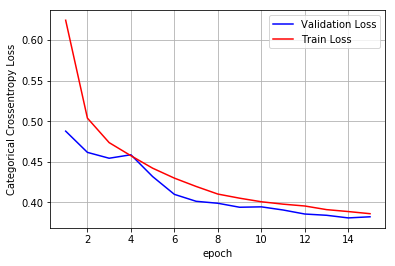

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
nb_epoch=15
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [77]:
#https://bicepjai.github.io/machine-learning/2016/08/22/tensorboard-on-gcloud.html
# create model with seven inputs
model = Model([input1,input2,input3,input4,input5,input6,input7], output)
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=[auc])
model.load_weights("weights_copy.best.hdf5")

In [109]:
y_pred_train=model.predict([X_train_txt,X_train_school_state,X_train_project_grade,X_train_project_cat,X_train_project_subcat, X_train_teacher_prefix,remain_train])
y_pred_cv = model.predict([X_cv_txt,X_cv_school_state,X_cv_project_grade,X_cv_project_cat,X_cv_project_subcat,X_cv_teacher_prefix,remain_cv])
y_pred_test = model.predict([X_test_txt,X_test_school_state,X_test_project_grade,X_test_project_cat,X_test_project_subcat,X_test_teacher_prefix,remain_test])

In [110]:
print("Auc score on test data: %0.3f"%roc_auc_score(y_test,y_pred_test))
print("Auc score on CV data: %0.3f"%roc_auc_score(y_cv,y_pred_cv))
print("Auc score on train data: %0.3f"%roc_auc_score(y_train,y_pred_train))

Auc score on test data: 0.750
Auc score on CV data: 0.760
Auc score on train data: 0.780


# Creating 3rd type of model with CnNNLSTM and CONV1D

In [53]:
#def split_dataset(dataframe):
col_names = project_data.columns
train,test,y_train,y_test = train_test_split(project_data, class_label , stratify = class_label,test_size = 0.3)
train,cv,y_train,y_cv = train_test_split(train,y_train,stratify = y_train,test_size = 0.2)

train.shape,test.shape,cv.shape,y_train.shape,y_test.shape,y_cv.shape

((61178, 7), (32775, 7), (15295, 7), (61178,), (32775,), (15295,))

In [54]:
remain_train =train['remaining_input']
remain_test = test['remaining_input']
remain_cv= cv['remaining_input']

train.drop(['remaining_input'], axis=1,inplace=True)
test.drop(['remaining_input'], axis=1,inplace=True)
cv.drop(['remaining_input'], axis=1,inplace=True)

In [55]:
train.head(2)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,total_txt
66024,ms,wi,grades_9_12,literacy_language,literacy_literature_writing,A Notebook of One's Own: Pensive Personal Penn...
9077,ms,co,grades_9_12,literacy_language,literacy,Fantastic Seats and Where to Find Them I teach...


<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In [269]:
train.head(2)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,total_txt
22977,ms,oh,grades_prek_2,literacy_language_math_science,literature_writing_mathematics,Kinder Kids Need Supplies! My students are in ...
18722,ms,wa,grades_3_5,literacy_language,esl_literacy,Multicultural books for multicultural students...


In [57]:
X_train=pd.DataFrame()
X_test=pd.DataFrame()
X_cv=pd.DataFrame()

In [58]:
from keras.preprocessing.text import Tokenizer
#https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
#for i in train.columns:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train['total_txt'])
#Based on the train data we shall extract the topwords and assign ranking.
X_train['total_txt'] = tokenizer.texts_to_sequences(train['total_txt'])
X_test['total_txt'] =tokenizer.texts_to_sequences(test['total_txt'])
X_cv['total_txt'] =tokenizer.texts_to_sequences(cv['total_txt'])

In [60]:
r=list()
for i in train['total_txt']:
    r.append(len(pd.Series(i).str.split()[0]))

length=max(r)

In [61]:
max_review_length = length
X_train_txt = pad_sequences(X_train['total_txt'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_txt = pad_sequences(X_test['total_txt'], maxlen=max_review_length)
X_cv_txt = pad_sequences(X_cv['total_txt'], maxlen=max_review_length)
print(X_train_txt.shape)
print(X_train_txt[256])

(61178, 549)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

### One hot encoding to all the categorical values

In [62]:
vect = CountVectorizer()
school_state_train = vect.fit_transform(train['school_state'])
school_state_test = vect.transform(test['school_state'])
school_state_cv = vect.transform(cv['school_state'])
ss1=school_state_train.shape[1]
print(school_state_train.shape)

vect = CountVectorizer()
project_grade_train = vect.fit_transform(train['project_grade_category'])
project_grade_test = vect.transform(test['project_grade_category'])
project_grade_cv = vect.transform(cv['project_grade_category'])
ss2=project_grade_train.shape[1]
print(project_grade_train.shape)

vect = CountVectorizer()
project_cat_train = vect.fit_transform(train['project_subject_categories'])
project_cat_test = vect.transform(test['project_subject_categories'])
project_cat_cv = vect.transform(cv['project_subject_categories'])
ss3=project_cat_train.shape[1]
print(project_cat_train.shape)

vect = CountVectorizer()
project_subcat_train = vect.fit_transform(train['project_subject_subcategories'])
project_subcat_test = vect.transform(test['project_subject_subcategories'])
project_subcat_cv = vect.transform(cv['project_subject_subcategories'])
ss4=project_subcat_train.shape[1]
print(project_subcat_train.shape)

vect = CountVectorizer()
teacher_prefix_train = vect.fit_transform(train['teacher_prefix'])
teacher_prefix_test = vect.transform(test['teacher_prefix'])
teacher_prefix_cv = vect.transform(cv['teacher_prefix'])
ss5=teacher_prefix_train.shape[1]
print(teacher_prefix_train.shape)

(61178, 51)
(61178, 4)
(61178, 51)
(61178, 385)
(61178, 5)


In [63]:
from scipy.sparse import hstack 
exp_train = hstack((school_state_train,project_grade_train,project_cat_train,project_subcat_train,teacher_prefix_train,remain_train[:,None]))
exp_cv = hstack((school_state_cv,project_grade_cv,project_cat_cv,project_subcat_cv,teacher_prefix_cv,remain_cv[:,None]))
exp_test = hstack((school_state_test,project_grade_test,project_cat_test,project_subcat_test,teacher_prefix_test,remain_test[:,None]))

In [65]:
other_train=exp_train.todense()
other_test = exp_test.todense()
other_cv = exp_cv.todense()


other_train = np.resize(other_train,new_shape=(61178,497,1))
other_test =np.resize(other_test,new_shape=(32775,497,1))
other_cv = np.resize(other_cv,new_shape=(15295,497,1))

In [66]:
other_cv.shape

(15295, 497, 1)

In [81]:
#converting class labels to categorical variables
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_cv = to_categorical(y_cv)

In [67]:
for i in train.columns:
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(train[i])
    print('for ' + i +' column, the input features are :: {0}'.format(len(tokenizer.word_index)))

for teacher_prefix column, the input features are :: 5
for school_state column, the input features are :: 51
for project_grade_category column, the input features are :: 9
for project_subject_categories column, the input features are :: 15
for project_subject_subcategories column, the input features are :: 37
for total_txt column, the input features are :: 57414


In [68]:
t = Tokenizer(num_words=5000)
t.fit_on_texts(train['total_txt'])
total_text_features = t.word_index

In [83]:
input1 = Input(batch_shape=(None,549))
x1 = Embedding(input_dim=len(tokenizer.word_index)+1,output_dim= 300,weights=[embedding_mat(total_text_features)],trainable = False)(input1)
x1 = LSTM(256,return_sequences=True)(x1)
x1 = Flatten()(x1)

# input 2
input2 = Input(shape=(497,1))
x2 = Conv1D(filters=64,kernel_size=3,strides=1)(input2)
x2 = Conv1D(filters=64,kernel_size=3,strides=1)(x2)
x2 = Flatten()(x2)

# merging both the inputs
concat = concatenate([x1,x2])
x = Dense(300,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concat)
x = Dropout(0.4)(x)
x = Dense(256,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(128,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.6)(x)
output = Dense(2, activation = 'softmax')(x)
 
# create model with two inputs
model = Model([input1,input2], output)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.adam(lr=0.0006,decay = 1e-4), metrics=[auc])
print(model.summary())

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 549)          0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 497, 1)       0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 549, 300)     17224500    input_11[0][0]                   
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 495, 64)      256         input_12[0][0]                   
____________________________________________________________________________________________

In [80]:
X_cv_txt.shape

(15295, 549)

In [85]:
#model fitting
filepath="weights_3.best_copy.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
#tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
#callbacks_list = [checkpoint,tensorboard]
#my_callbacks = [EarlyStopping(monitor='auc', patience=300, verbose=1, mode='max')]
history=model.fit([X_train_txt,other_train], y_train, nb_epoch=13,verbose=1,batch_size=256,\
          validation_data=([X_cv_txt,other_cv], y_cv),class_weight = "balanced")#,callbacks = callbacks_list

Train on 61178 samples, validate on 15295 samples
Epoch 1/13
61178/61178 [==============================] - 146s 2ms/step - loss: 0.7356 - auc: 0.5158 - val_loss: 0.6210 - val_auc: 0.5292
Epoch 2/13
61178/61178 [==============================] - 142s 2ms/step - loss: 0.5814 - auc: 0.5164 - val_loss: 0.6023 - val_auc: 0.4956
Epoch 3/13
61178/61178 [==============================] - 141s 2ms/step - loss: 0.5253 - auc: 0.5202 - val_loss: 0.5636 - val_auc: 0.5214
Epoch 4/13
61178/61178 [==============================] - 141s 2ms/step - loss: 0.4916 - auc: 0.5842 - val_loss: 0.5473 - val_auc: 0.6727
Epoch 5/13
61178/61178 [==============================] - 140s 2ms/step - loss: 0.4568 - auc: 0.6987 - val_loss: 0.5648 - val_auc: 0.7294
Epoch 6/13
61178/61178 [==============================] - 141s 2ms/step - loss: 0.4376 - auc: 0.7368 - val_loss: 0.5340 - val_auc: 0.7499
Epoch 7/13
61178/61178 [==============================] - 140s 2ms/step - loss: 0.4228 - auc: 0.7509 - val_loss: 0.4928 - 

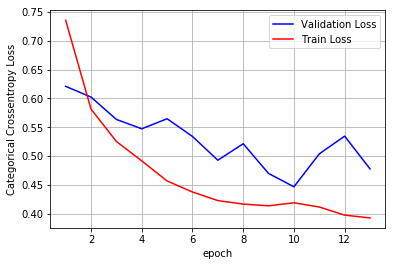

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
nb_epoch=13
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [87]:
print("Auc score on test data: %0.3f"%roc_auc_score(y_test,model.predict([X_test_txt,other_test])))
print("Auc score on CV data: %0.3f"%roc_auc_score(y_cv,model.predict([X_cv_txt,other_cv])))
print("Auc score on train data: %0.3f"%roc_auc_score(y_train,model.predict([X_train_txt,other_train])))

Auc score on test data: 0.762
Auc score on CV data: 0.761
Auc score on train data: 0.833


# Creating 2nd type of model with TFIDF values

In [46]:
col_names = project_data.columns
train,test,y_train,y_test = train_test_split(project_data, class_label , stratify = class_label,test_size = 0.3)
train,cv,y_train,y_cv = train_test_split(train,y_train,stratify = y_train,test_size = 0.2)

In [47]:
train.shape,test.shape,cv.shape,y_train.shape,y_test.shape,y_cv.shape

((61178, 7), (32775, 7), (15295, 7), (61178,), (32775,), (15295,))

In [48]:
train.head(1)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,remaining_input,total_txt
64873,ms,fl,grades_prek_2,literacy_language_math_science,literacy_mathematics,354.53931,Active Seating for Active Brains! The students...


### Using TFIDF

In [49]:
tfidf = TfidfVectorizer()
text_values = tfidf.fit_transform(train['total_txt'])
text_idf =tfidf.idf_

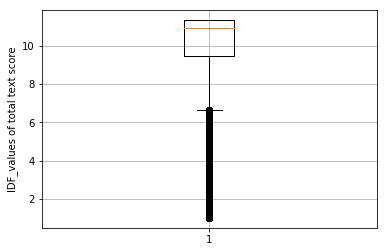

In [50]:
plt.boxplot(tfidf.idf_)
plt.ylabel("IDF_values of total text score")
plt.grid()
plt.show()

In [51]:
print("The 25 percentile of idf score is :", np.percentile(tfidf.idf_,[25]))
print("The 75 percentile of idf score is :",np.percentile(tfidf.idf_,[75]))

The 25 percentile of idf score is : [9.45660991]
The 75 percentile of idf score is : [11.32841209]


In [52]:
#https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer
feature_idf = zip(tfidf.get_feature_names(),tfidf.idf_)
imp_words = []
for x,y in feature_idf:
    if y >=9.45660991 and y <=11.32841209 :
        imp_words.append(x)

In [53]:
all_features = tfidf.get_feature_names()
not_imp_words = []
for word in all_features:
    if word not in imp_words:
        not_imp_words.append(word)
        
def extracting_idf_words_only(sentences):
    processed = []
    for sent in tqdm(sentences):
        sent = ' '.join(e for e in sent.split() if e not in not_imp_words)
        processed.append(sent)
    return processed

In [60]:
train['tfidf_txt'] = extracting_idf_words_only(train['total_txt'])
test['tfidf_txt'] = extracting_idf_words_only(test['total_txt'])
cv['tfidf_txt'] = extracting_idf_words_only(cv['total_txt'])

100%|██████████| 15295/15295 [30:14<00:00,  8.43it/s]


In [56]:
train.head(2)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,remaining_input,total_txt,tfidf_txt
64873,ms,fl,grades_prek_2,literacy_language_math_science,literacy_mathematics,354.539310,Active Seating for Active Brains! The students...,"Active Seating Active Brains! The energetic, c..."
14488,mrs,nj,grades_prek_2,specialneeds,specialneeds,427.687288,Sensory Area for Kindergarten Rock Stars! Kind...,Sensory Area Kindergarten Rock Stars! Kinderga...


In [57]:
print(train['total_txt'].values[0])
print("#"*50)
print(train['tfidf_txt'].values[0])

Active Seating for Active Brains! The students that fill my second grade classroom are energetic, creative, and kind. They float in each day with their friendly demeanors and immediately engage in conversation with anyone and everyone! My students have created an inviting, and cohesive atmosphere.\r\nThey like to move, they love to read and adore one-on-one positive attention . The students in my class have varying socioeconomic statuses and situations.  My goal is to focus on their potential and continuous growth every day in my classroom in hopes of creating an environment that caters to each student’s unique way of learning. I am hopeful to inspire even our most struggling learners to continue to do and find what works for them!I can remember the exact moment I realized typical desks and chairs would not help my second graders accomplish their goals. We had a busy morning ahead of us with a lot to catch up on, so I tried something new; I gave a total of four assignments and explaine

In [58]:
remain_train =train['remaining_input']
remain_test = test['remaining_input']
remain_cv= cv['remaining_input']

train.drop(['remaining_input'], axis=1,inplace=True)
test.drop(['remaining_input'], axis=1,inplace=True)
cv.drop(['remaining_input'], axis=1,inplace=True)

In [59]:
train.drop(['total_txt'],axis=1,inplace=True)
test.drop(['total_txt'],axis=1,inplace=True)
cv.drop(['total_txt'],axis=1,inplace=True)

In [61]:
train.isnull().any()

teacher_prefix                   False
school_state                     False
project_grade_category           False
project_subject_categories       False
project_subject_subcategories    False
tfidf_txt                        False
dtype: bool

### converting into numerical format

In [62]:
X_train=pd.DataFrame()
X_test=pd.DataFrame()
X_cv=pd.DataFrame()

In [63]:
from keras.preprocessing.text import Tokenizer
#https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
for i in train.columns:
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(train[i])
    #Based on the train data we shall extract the topwords and assign ranking.
    X_train[i] = tokenizer.texts_to_sequences(train[i])
    X_test[i] =tokenizer.texts_to_sequences(test[i])
    X_cv[i] =tokenizer.texts_to_sequences(cv[i])

In [64]:
print(X_train.shape)
X_train.head(2)

(61178, 6)


,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,tfidf_txt
0,[2],[4],"[1, 2, 3]","[1, 2, 3, 4]","[1, 2]","[180, 116, 180, 882, 7, 314, 158, 444, 6, 446,..."
1,[1],[18],"[1, 2, 3]",[7],[6],"[540, 128, 76, 1159, 1094, 76, 1657, 9, 1, 234..."


In [87]:
#converting class labels to categorical variables
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_cv = to_categorical(y_cv)

In [66]:
r=list()
for i in train['tfidf_txt']:
    r.append(len(pd.Series(i).str.split()[0]))

length=max(r)
length

215

In [67]:
max_review_length = length
X_train_txt = pad_sequences(X_train['tfidf_txt'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_txt = pad_sequences(X_test['tfidf_txt'], maxlen=max_review_length)
X_cv_txt = pad_sequences(X_cv['tfidf_txt'], maxlen=max_review_length)
print(X_train_txt.shape)
print(X_train_txt[256])

(61178, 215)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  423 2822 2090   51  863  198    4   29   47   35    1   94  156  407
   14  230    2    5    2  168  162  795 3922   96  947    3  165  212
  242  316  228 1066 1908    2    5    2   33  690   40  152  19

In [68]:
max_review_length = 1
X_train_school_state = pad_sequences(X_train['school_state'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_school_state = pad_sequences(X_test['school_state'], maxlen=max_review_length)
X_cv_school_state = pad_sequences(X_cv['school_state'], maxlen=max_review_length)
s1=X_test_school_state.shape[1]
print(X_test_school_state.shape)
print(X_test_school_state[0])

max_review_length = 1
X_train_project_grade = pad_sequences(X_train['project_grade_category'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_project_grade = pad_sequences(X_test['project_grade_category'], maxlen=max_review_length)
X_cv_project_grade = pad_sequences(X_cv['project_grade_category'], maxlen=max_review_length)
s2=X_train_project_grade.shape[1]
print(X_train_project_grade.shape)
print(X_train_project_grade[0])

max_review_length = 1
X_train_project_cat = pad_sequences(X_train['project_subject_categories'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_project_cat = pad_sequences(X_test['project_subject_categories'], maxlen=max_review_length)
X_cv_project_cat = pad_sequences(X_cv['project_subject_categories'], maxlen=max_review_length)
s3=X_train_project_cat.shape[1]
print(X_train_project_cat.shape)
print(X_train_project_cat[0])

max_review_length = 1
X_train_project_subcat = pad_sequences(X_train['project_subject_subcategories'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_project_subcat = pad_sequences(X_test['project_subject_subcategories'], maxlen=max_review_length)
X_cv_project_subcat = pad_sequences(X_cv['project_subject_subcategories'], maxlen=max_review_length)
s4=X_train_project_subcat.shape[1]
print(X_train_project_subcat.shape)
print(X_train_project_subcat[0])

max_review_length = 1
X_train_teacher_prefix = pad_sequences(X_train['teacher_prefix'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_test_teacher_prefix = pad_sequences(X_test['teacher_prefix'], maxlen=max_review_length)
X_cv_teacher_prefix = pad_sequences(X_cv['teacher_prefix'], maxlen=max_review_length)
s5=X_train_teacher_prefix.shape[1]
print(X_train_teacher_prefix.shape)
print(X_test_teacher_prefix[0])

(32775, 1)
[4]
(61178, 1)
[3]
(61178, 1)
[4]
(61178, 1)
[2]
(61178, 1)
[1]


## model 2

In [69]:
t = Tokenizer(num_words=5000)
t.fit_on_texts(train['tfidf_txt'])
total_text_features = t.word_index

In [70]:
for i in train.columns:
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(train[i])
    print('for ' + i +' column, the input features are :  {0}'.format(len(tokenizer.word_index)))

for teacher_prefix column, the input features are :  5
for school_state column, the input features are :  51
for project_grade_category column, the input features are :  9
for project_subject_categories column, the input features are :  15
for project_subject_subcategories column, the input features are :  37
for tfidf_txt column, the input features are :  50087


In [90]:
#total_txt input 1 
input1 = Input(shape=(length,))
x1 = Embedding(input_dim=len(tokenizer.word_index)+1,output_dim= 300,weights=[embedding_mat(total_text_features)],trainable=False)(input1)
x1 = SpatialDropout1D(0.3)(x1)
x1 = LSTM(128,return_sequences=True)(x1)
x1 = Flatten()(x1)

#school_state input 2
input2 = Input(shape=(1,))
x2 = Embedding(input_dim= s1+1 ,output_dim= 2)(input2)
x2 = Flatten()(x2)

#project_grade_category input 3
input3 = Input(shape=(1,))
x3 = Embedding(input_dim= s2+1 ,output_dim= 2)(input3)
x3 = Flatten()(x3)

#project_subject_categories input 4
input4 = Input(shape=(1,))
x4 = Embedding(input_dim=s3+1 ,output_dim= 2)(input4)
x4 = Flatten()(x4)

#project_subject_subcategories input 5
input5 = Input(shape=(1,))
x5 = Embedding(input_dim=s4+1 ,output_dim= 50)(input5)
x5 = Flatten()(x5)

#teacher_prefix  input 6
input6 = Input(shape=(1,))
x6 = Embedding(input_dim=s5+1,output_dim= 5)(input6)
x6 = Flatten()(x6)

#remaining input layers of numerical data input 7
input7 = Input(shape=(1,))
x7 = Dense(16,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(input7)
#x7 = Flatten()(x7)

#merging all the inputs 
concat = concatenate([x1,x2,x3,x4,x5,x6,x7])
#x = BatchNormalization()(concat)

x = Dense(128,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concat)
x = Dropout(0.5)(x)
x = Dense(64,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(32,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
output = Dense(2, activation = 'softmax')(x)

# create model with seven inputs
model2 = Model([input1,input2,input3,input4,input5,input6,input7], output)
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=[auc])
#lrate = LearningRateScheduler(step_decay)
print(model2.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 215)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 215, 300)     15026400    input_9[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_2 (SpatialDro (None, 215, 300)     0           embedding_7[0][0]                
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 1)            0                                            
____________________________________________________________________________________________

In [91]:
from keras.callbacks import TensorBoard
filepath="weights2_copy.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,TensorBoard(log_dir='logs/{}'.format(time()))]
history=model2.fit([X_train_txt,X_train_school_state,X_train_project_grade,X_train_project_cat,X_train_project_subcat,\
           X_train_teacher_prefix,remain_train], y_train, nb_epoch=20,verbose=1,batch_size=256,\
          validation_data=([X_cv_txt,X_cv_school_state,X_cv_project_grade,X_cv_project_cat,X_cv_project_subcat,\
           X_cv_teacher_prefix,remain_cv]  , y_cv),callbacks =callbacks_list,class_weight = class_wght )
model2.load_weights("weights_2.best.hdf5")

Train on 61178 samples, validate on 15295 samples
Epoch 1/20
61178/61178 [==============================] - 53s 873us/step - loss: 0.7142 - auc: 0.5019 - val_loss: 0.4689 - val_auc: 0.4990

Epoch 00001: val_auc improved from -inf to 0.49904, saving model to weights2_copy.best.hdf5
Epoch 2/20
61178/61178 [==============================] - 52s 851us/step - loss: 0.5321 - auc: 0.4977 - val_loss: 0.4734 - val_auc: 0.5007

Epoch 00002: val_auc improved from 0.49904 to 0.50073, saving model to weights2_copy.best.hdf5
Epoch 3/20
61178/61178 [==============================] - 52s 853us/step - loss: 0.4879 - auc: 0.5066 - val_loss: 0.4746 - val_auc: 0.5019

Epoch 00003: val_auc improved from 0.50073 to 0.50185, saving model to weights2_copy.best.hdf5
Epoch 4/20
61178/61178 [==============================] - 53s 867us/step - loss: 0.4728 - auc: 0.4978 - val_loss: 0.4634 - val_auc: 0.5037

Epoch 00004: val_auc improved from 0.50185 to 0.50369, saving model to weights2_copy.best.hdf5
Epoch 5/20
61

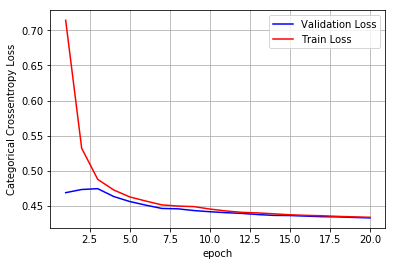

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
nb_epoch=20
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [93]:
pred_y_test2=model2.predict([X_test_txt,X_test_school_state,X_test_project_grade,X_test_project_cat,X_test_project_subcat,X_test_teacher_prefix,remain_test])
pred_y_cv2 = model2.predict([X_cv_txt,X_cv_school_state,X_cv_project_grade,X_cv_project_cat,X_cv_project_subcat,X_cv_teacher_prefix,remain_cv])
pred_y_train2=model2.predict([X_train_txt,X_train_school_state,X_train_project_grade,X_train_project_cat,X_train_project_subcat,X_train_teacher_prefix,remain_train])

In [94]:
print("Auc score on test data: %0.3f"%roc_auc_score(y_test,pred_y_test2))
print("Auc score on CV data: %0.3f"%roc_auc_score(y_cv,pred_y_cv2))
print("Auc score on train data: %0.3f"%roc_auc_score(y_train,pred_y_train2))

Auc score on test data: 0.503
Auc score on CV data: 0.503
Auc score on train data: 0.497


# Conclusion:

In [96]:
from prettytable import PrettyTable
x = PrettyTable()
x = PrettyTable(["LSTM_Models", "train_accuracy", "test_accuracy", "CV_accuracy"])
x.add_row(['1',0.780,0.750,0.760])
x.add_row(['2',0.497,0.505,0.503])
x.add_row(['3',0.833,0.503,0.503])
print(x)

+-------------+----------------+---------------+-------------+
| LSTM_Models | train_accuracy | test_accuracy | CV_accuracy |
+-------------+----------------+---------------+-------------+
|      1      |      0.78      |      0.75     |     0.76    |
|      2      |     0.497      |     0.505     |    0.503    |
|      3      |     0.833      |     0.503     |    0.503    |
+-------------+----------------+---------------+-------------+
